## 1. Plot the observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
set_style("whitegrid")
reg = LinearRegression()

In [2]:
# Select AAP data to do the time series prediction
#Apple data for last 5 years

data_aap = pd.read_csv("data/individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv",
                        parse_dates=['date'])
# Split the data into train and test data by index slicing
# The test data is the last 120 indices

del data_aap['open']
del data_aap['high']
del data_aap['low']
del data_aap['Name']
del data_aap['volume']

data_aap_test = data_aap.iloc[-60:].copy()
data_aap_train = data_aap.drop(data_aap_test.index).copy()
data_aap_val = data_aap_train.iloc[-60:]

A= data_aap_train.transpose()

L1 = len(data_aap_train)
val_length = len(data_aap_val)
test_length = len(data_aap_test)

In [3]:
#The Naive Prediction 
Naive_Predictions = [0]
for i in range(1,L1):
    Naive_Predictions.append(A.iloc[1][i-1])  

In [4]:
#Sliding Windows Regression

W= 2# this is the size of the data in each window

#This loop will add W columns to the data. The first one is the closing price and each one after is a right shift of the previous.
#For each day i, data[close_0, close_W) contains the closing prace of day i and the previous W-1 days 
for i in range(1,W): 
    data_aap_train[f'close {i}'] = data_aap_train['close'].shift(i)

A= data_aap_train.transpose() #This takes the transpose of the data when viewed as a matrix

Predictions = []
#Each prediction will be gotten from taking in the window of data points [i, i + W), performing a linear regression on this
#on this window giving a line f_i, and we adjoin f_i(W) 

for i in range(W-1):
    Predictions.append(0) #this gives a prediction of 0 for the first W-1 days

#This does the linear regression for each window and then appends the prediction    
for i in range(W-1, L1): #note we need at least W closing prices before each day i 
    X_1 = np.arange(i-(W-1),i+1).reshape(-1, 1) #This is each window. It's of length W
    y_1 = A[i][1:] #These are the closing prices for each window. 
    reg.fit(X_1, y_1) # The regression within a window
    Predictions.append( reg.predict([[i+1]])[0]  )


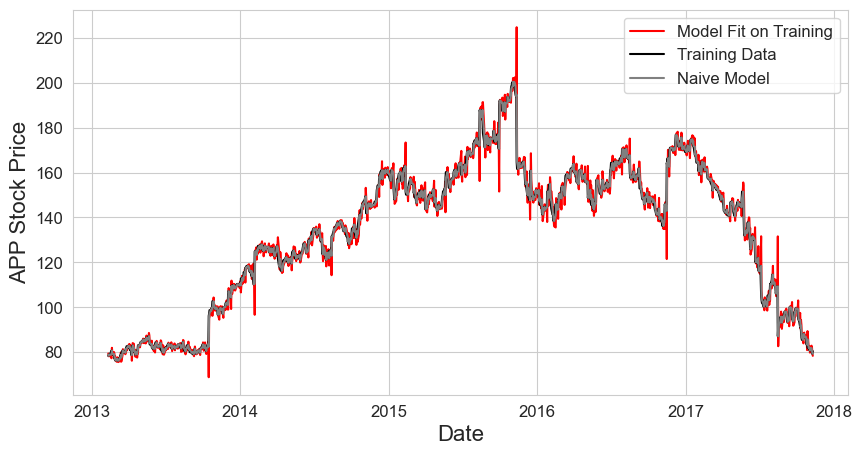

In [5]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date[W-1:],
            Predictions[W-1:L1],
            "r",
            label="Model Fit on Training")

plt.plot(data_aap_train.date[W-1:],
             A.iloc[1][W-1:],
             "black",
            label="Training Data")

plt.plot(data_aap_train.date[W-1:],
            Naive_Predictions[W-1:],
            "gray",
            label="Naive Model")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("APP Stock Price", fontsize=16)

plt.show()

In [6]:
#Sliding Windows Prediction error on Validation Set
print(mean_squared_error(A.iloc[1][L1-val_length:],Predictions[L1-val_length:]))
#Naive Prediction errpr on Validation Set
print(mean_squared_error(A.iloc[1][L1-val_length:],Naive_Predictions[L1-val_length:]))

10.31820000000039
2.5795499999999967
